In [1]:
import pandas as pd
import numpy as np
import sklearn
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
plt.rcdefaults()
%matplotlib inline

In [2]:
production=pd.read_pickle("./processed/production_all_dates_and_variables.pkl")


/home/srummel/anaconda2/envs/csc481/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Saving Hour_Versus_Solar_KWH_Generation_Overlaid_with_Solar_Elevation.png
Saving Hour_Versus_Solar_KWH_Generation_Overlaid_with_Cloud_Cover_Fraction.png
Saving Hour_Versus_Solar_KWH_Generation_Overlaid_with_Dew_Point.png
Saving Hour_Versus_Solar_KWH_Generation_Overlaid_with_Humidity_Fraction.png
Saving Hour_Versus_Solar_KWH_Generation_Overlaid_with_Precipitation.png
Saving Hour_Versus_Solar_KWH_Generation_Overlaid_with_Pressure.png
Saving Hour_Versus_Solar_KWH_Generation_Overlaid_with_Temperature.png
Saving Hour_Versus_Solar_KWH_Generation_Overlaid_with_Visibility.png
Saving Hour_Versus_Solar_KWH_Generation_Overlaid_with_Wind_Speed_AT_SOLARRAY.png


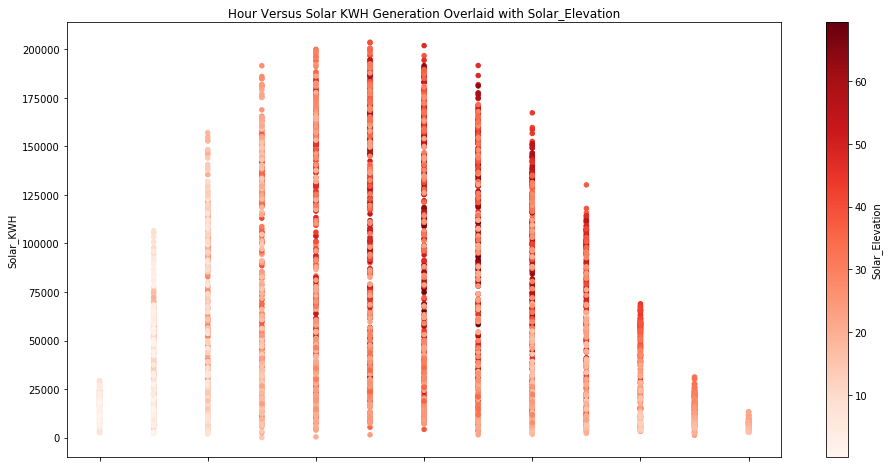

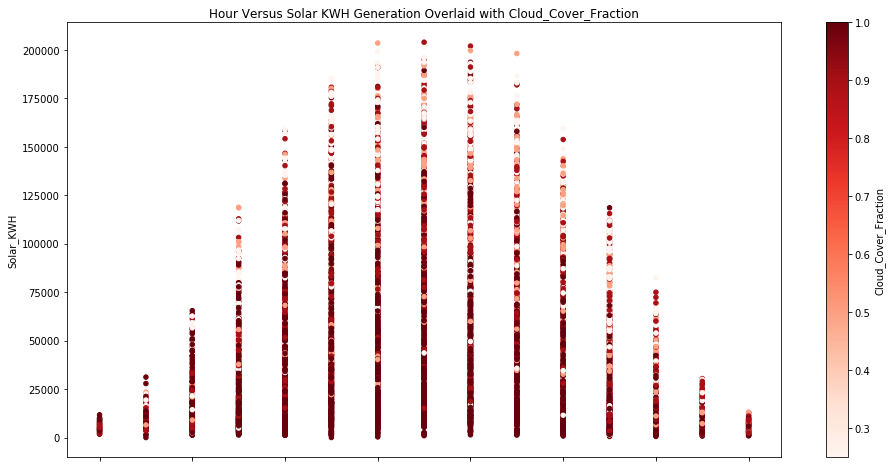

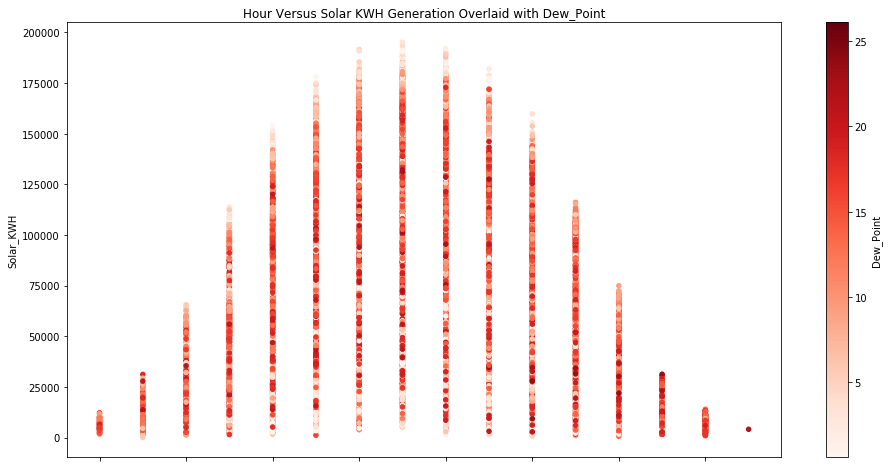

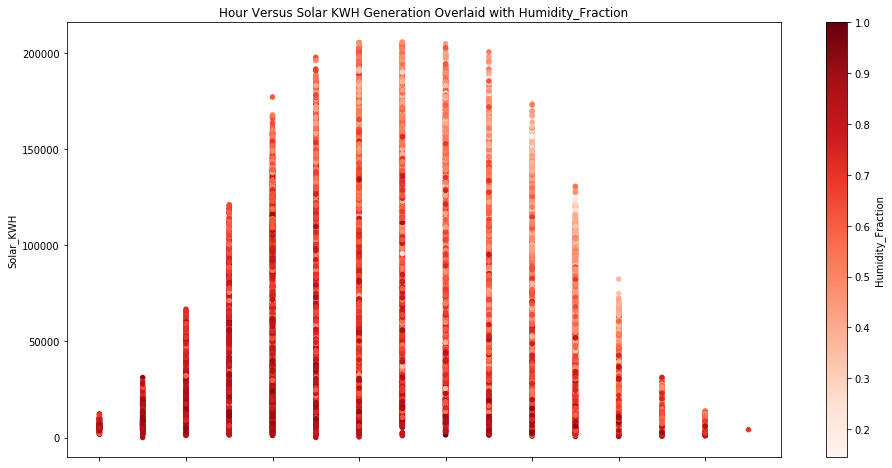

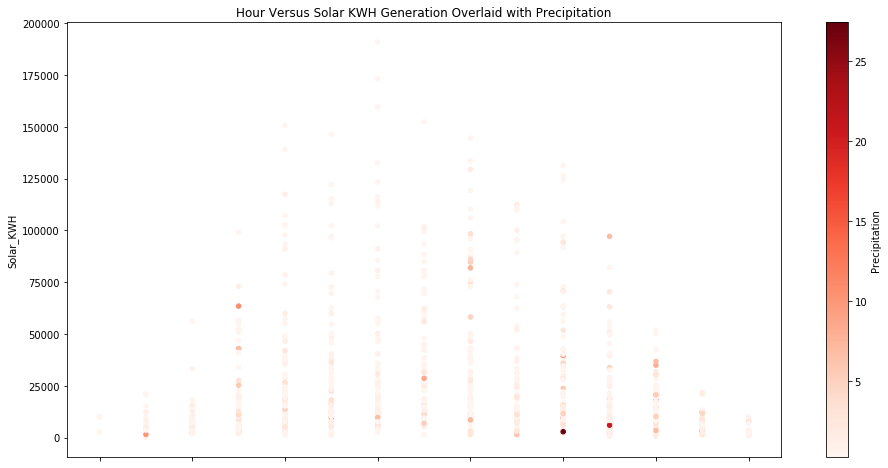

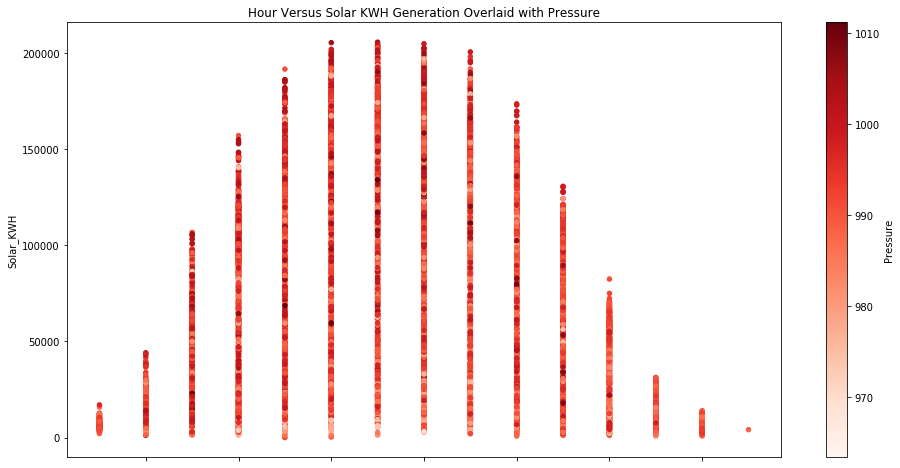

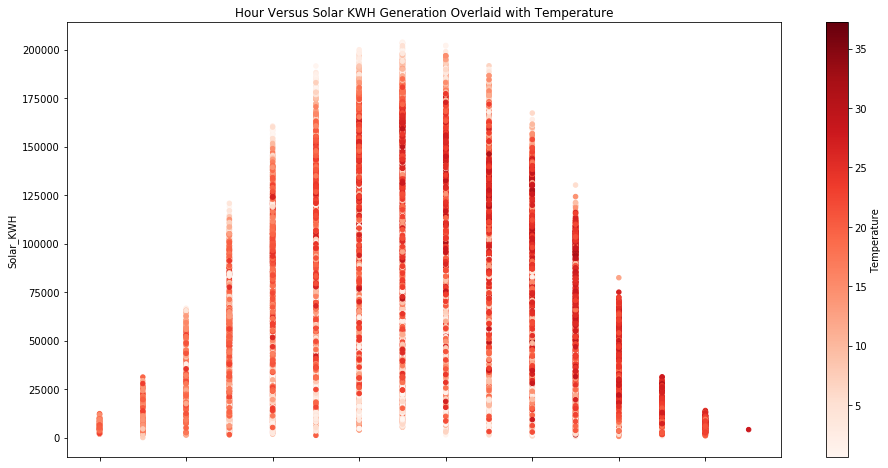

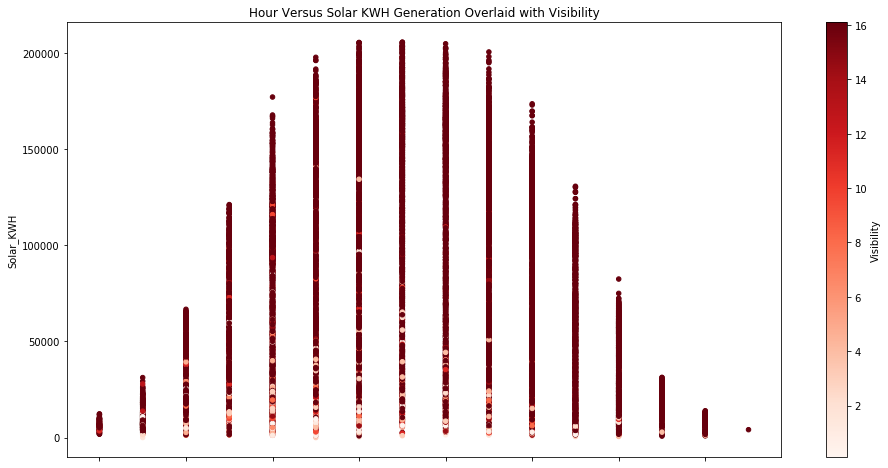

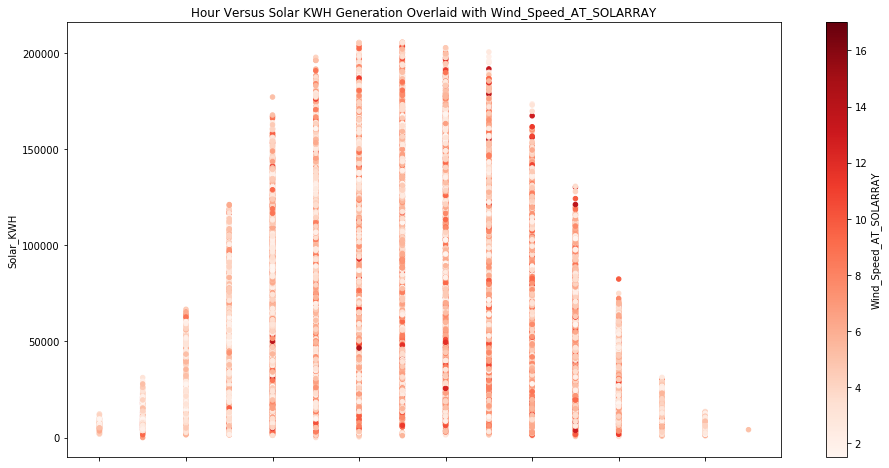

In [3]:
fields = [#'Solar_KWH',
          'Solar_Elevation',
          'Cloud_Cover_Fraction',
          'Dew_Point',
          'Humidity_Fraction',
          'Precipitation',
          'Pressure',
          'Temperature',
          'Visibility',
          'Wind_Speed_AT_SOLARRAY'
         ]

#only_sunlight=production.loc[(production.index.hour > 6) & (production.index.hour < 18)]

for field in fields:
    only_sunlight=production.loc[(production.Solar_KWH > 0.00) & (production[field] > 0.00)]
    only_sunlight['hour']=only_sunlight.index.hour
    plot_title="Hour Versus Solar KWH Generation Overlaid with {}".format(field)
    fname=plot_title.replace(' ', '_') + '.png'
    only_sunlight.plot.scatter(x='hour',
                               y='Solar_KWH',
                               c=field,
                               colormap='Reds',
                               #colormap='viridis',
                               title=plot_title,
                               figsize=(16, 8))
    print("Saving {}".format(fname))
    plt.savefig("./Images/{}".format(fname))
    

/home/srummel/anaconda2/envs/csc481/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Saving Hour_Versus_Wind_KWH_Generation_Overlaid_with_Wind_Speed_AT_WINDFARM.png
Saving Hour_Versus_Wind_KWH_Generation_Overlaid_with_Cloud_Cover_Fraction.png
Saving Hour_Versus_Wind_KWH_Generation_Overlaid_with_Dew_Point.png
Saving Hour_Versus_Wind_KWH_Generation_Overlaid_with_Humidity_Fraction.png
Saving Hour_Versus_Wind_KWH_Generation_Overlaid_with_Precipitation.png
Saving Hour_Versus_Wind_KWH_Generation_Overlaid_with_Pressure.png
Saving Hour_Versus_Wind_KWH_Generation_Overlaid_with_Temperature.png
Saving Hour_Versus_Wind_KWH_Generation_Overlaid_with_Visibility.png
Saving Hour_Versus_Wind_KWH_Generation_Overlaid_with_Wind_Speed_AT_SOLARRAY.png


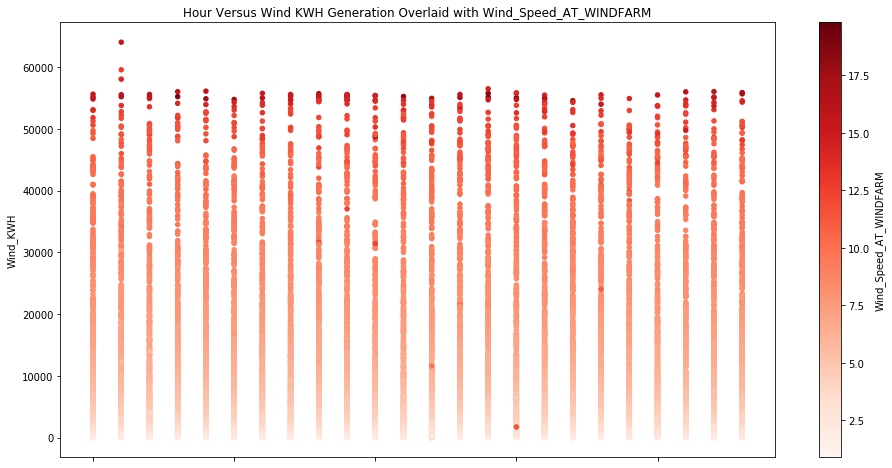

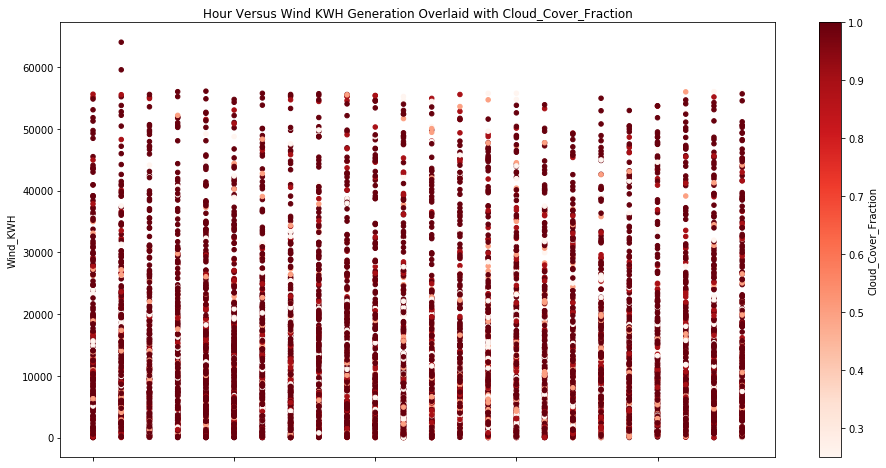

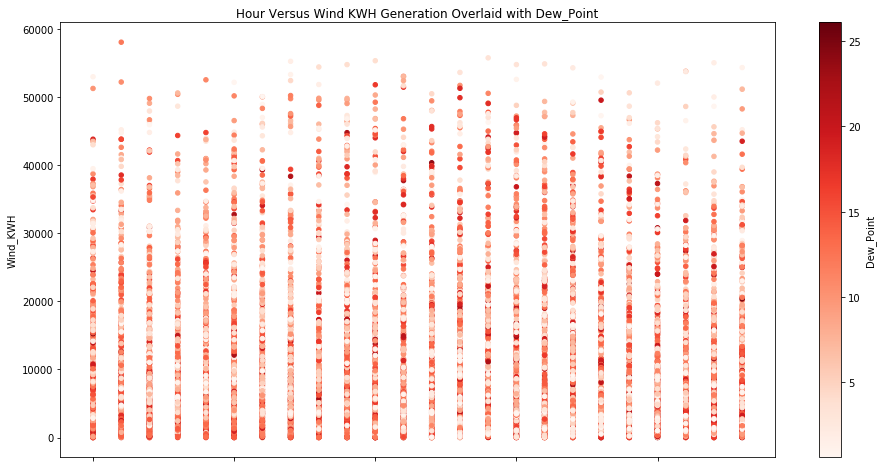

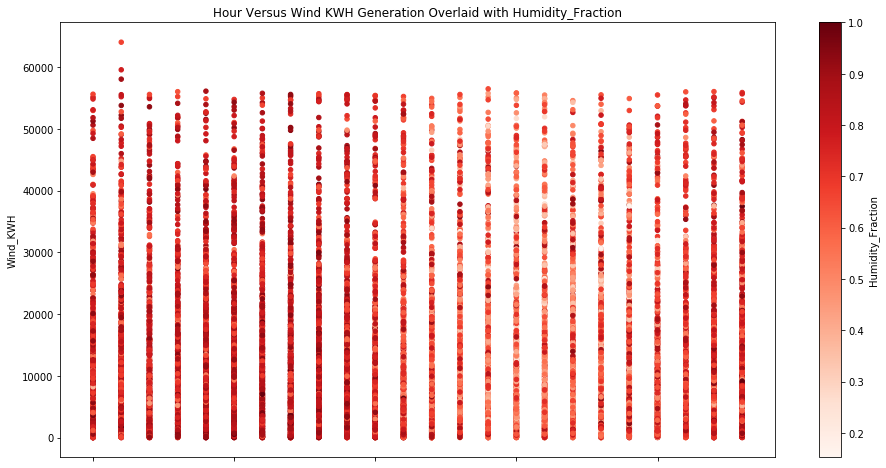

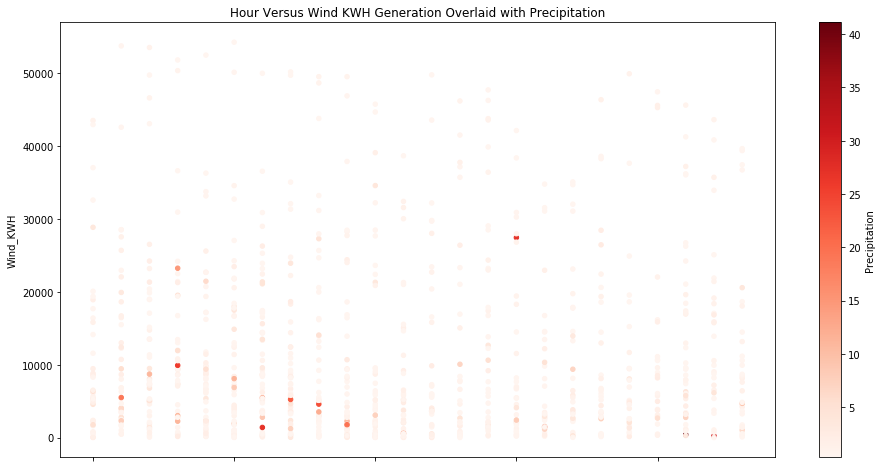

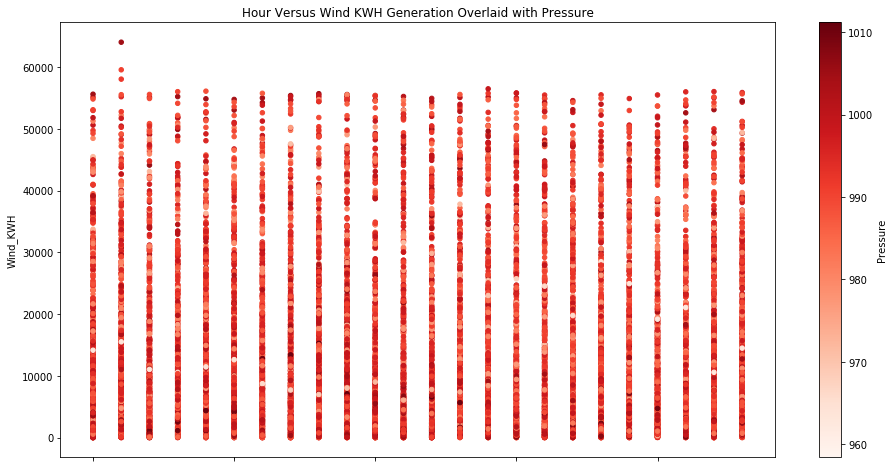

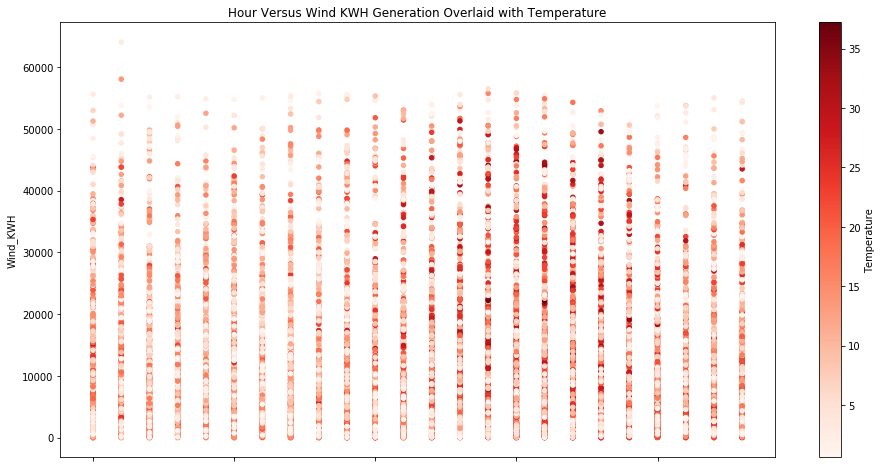

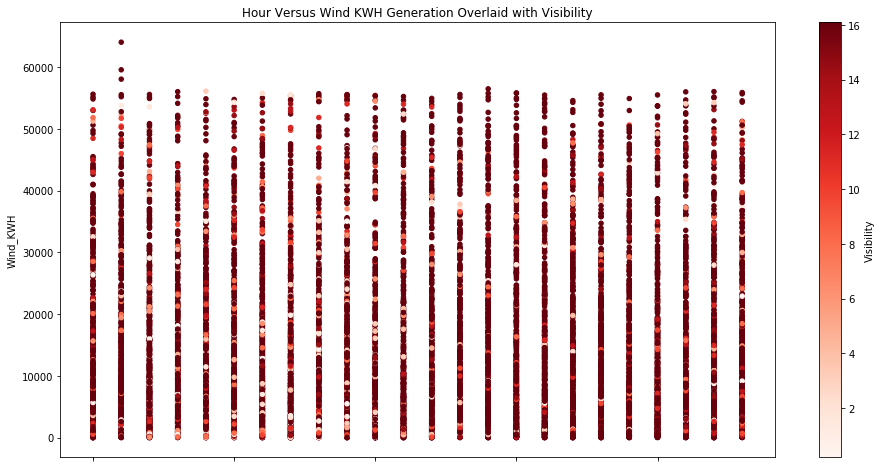

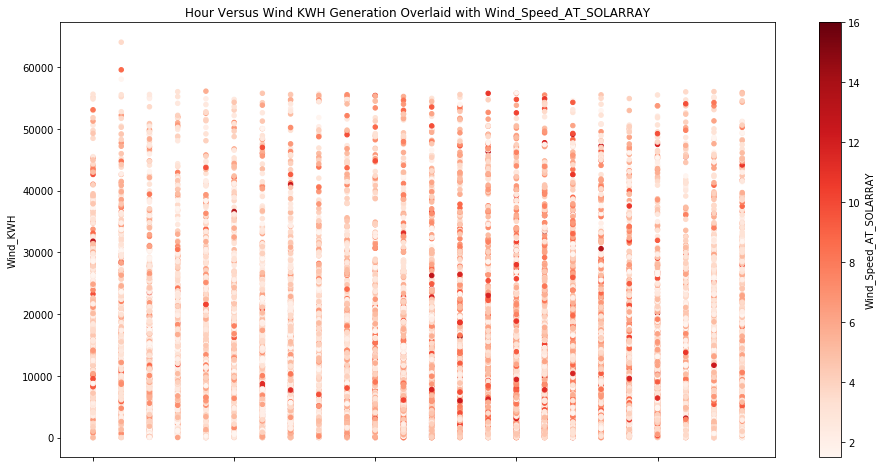

In [4]:
fields = [#'Solar_KWH',
          #'Solar_Elevation',
          'Wind_Speed_AT_WINDFARM',
          'Cloud_Cover_Fraction',
          'Dew_Point',
          'Humidity_Fraction',
          'Precipitation',
          'Pressure',
          'Temperature',
          'Visibility',
          'Wind_Speed_AT_SOLARRAY'
         ]

#only_sunlight=production.loc[(production.index.hour > 6) & (production.index.hour < 18)]

for field in fields:
    only_wind=production.loc[(production.Wind_KWH > 0.00) & (production[field] > 0.00)]
    only_wind['hour']=only_wind.index.hour
    plot_title="Hour Versus Wind KWH Generation Overlaid with {}".format(field)
    fname=plot_title.replace(' ', '_') + '.png'
    only_wind.plot.scatter(x='hour',
                           y='Wind_KWH',
                           c=field,
                           colormap='Reds',
                           #colormap='viridis',
                           title=plot_title,
                           figsize=(16, 8))
    print("Saving {}".format(fname))
    plt.savefig("./Images/{}".format(fname))

In [5]:
'''
Look at the previous X days for a given feature and 
identify how well change in variable value over the prior period 
predicts future production, or other variables.
'''

def modelgrid(srcdata, lookback):
    cols = []
    for t in range(lookback, 0, -1):
        cols.append('t' + str(t))
    cols.append('y')
    # Add date column
    cols.append('tdte')
    sze = srcdata.shape[0]
    tmp = pd.DataFrame(columns=cols)
    vals = []
    row = []
    newtble = []
    for i in range(0,sze):
        for j in range(i-lookback, i):
            if j < 0:
                val = 0.00
            else:
                val = srcdata.iloc[j,0]
            row.append(val)
        # Add on our y term
        row.append(srcdata.iloc[i,0])
        # Add on our date 
        row.append(srcdata.iloc[i,1])
        newtble.append(row)
        row = []
    tmp=pd.DataFrame(newtble,columns=cols)
    return tmp

fields = [#'Solar_KWH',
          'Solar_Elevation',
          'Cloud_Cover_Fraction',
          'Dew_Point',
          'Humidity_Fraction',
          'Precipitation',
          'Pressure',
          'Temperature',
          'Visibility',
          'Wind_Speed_AT_SOLARRAY'
         ]
# Need to sort alldata by date
keep_these=['Pressure', 'Time']

pressure = production[keep_these].sort_values(by='Time', ascending=True)
tmodel_data = modelgrid(pressure, 3)
print(tmodel_data.head())



/home/srummel/anaconda2/envs/csc481/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: 'Time' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version


    t5     t4     t3     t2     t1      y                tdte
0  0.0    0.0    0.0    0.0    0.0  991.9 2010-01-04 15:00:00
1  0.0    0.0    0.0    0.0  991.9  992.2 2010-01-04 16:00:00
2  0.0    0.0    0.0  991.9  992.2  992.9 2010-01-05 09:00:00
3  0.0    0.0  991.9  992.2  992.9  992.9 2010-01-05 10:00:00
4  0.0  991.9  992.2  992.9  992.9  993.2 2010-01-05 11:00:00


In [6]:
'''
Calculate the change over prior day
''' 

# Change from yesterday
tmodel_data['Ry'] = np.log(tmodel_data['y']/tmodel_data['t1'])
model_fields = len(list(tmodel_data)) - 3
print("There are {} days to count back...".format(model_fields))
for days_back in range(1, model_fields):
    # Manual setup - this sucks
    r_fld = 'R' + str(days_back)
    today = 't' + str(days_back)
    yesterday = 't' + str(days_back + 1)
    print("tmodel_data['{}'] = np.log(tmodel_data['{}']/tmodel_data['{}'])".format(r_fld, today, yesterday))
    tmodel_data[r_fld] = np.log(tmodel_data[today]/tmodel_data[yesterday])
    #tmodel_data['R1'] = np.log(tmodel_data['t1']/tmodel_data['t2'])
    #tmodel_data['R2'] = np.log(tmodel_data['t2']/tmodel_data['t3'])
    #tmodel_data['R3'] = np.log(tmodel_data['t3']/tmodel_data['t4'])
    #tmodel_data['R4'] = np.log(tmodel_data['t4']/tmodel_data['t5'])
    #tmodel_data['R5'] = np.log(tmodel_data['t5']/tmodel_data['t6'])
    #tmodel_data['R6'] = np.log(tmodel_data['t6']/tmodel_data['t7'])
    #tmodel_data['R7'] = np.log(tmodel_data['t7']/tmodel_data['t8'])
    #tmodel_data['R8'] = np.log(tmodel_data['t8']/tmodel_data['t9'])
    #tmodel_data['R9'] = np.log(tmodel_data['t9']/tmodel_data['t10'])

# Assumption - if we are dividing by zero, we either went from zero
# to a value, or dropped to zero, so replace with a 1 or -1
# to represent 'gained all' or 'lost all'.
tmodel_data.replace([np.inf], 1, inplace=True)
tmodel_data.replace([-np.inf], -1, inplace=True)

tmodel = tmodel_data.dropna(axis=0, how='any')
tmodel = tmodel.reset_index()


There are 5 days to count back...
tmodel_data['R1'] = np.log(tmodel_data['t1']/tmodel_data['t2'])
tmodel_data['R2'] = np.log(tmodel_data['t2']/tmodel_data['t3'])
tmodel_data['R3'] = np.log(tmodel_data['t3']/tmodel_data['t4'])
tmodel_data['R4'] = np.log(tmodel_data['t4']/tmodel_data['t5'])


/home/srummel/anaconda2/envs/csc481/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/srummel/anaconda2/envs/csc481/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [7]:
'''
We are trying to predict the sign on Delta_KWH on dat t+1

Run the prediciton using:
KNN 
LogisticRegression
other?

Show the confusion matrix and compute the F1 parameter.

All scenario testing should be done in the test dataset.
'''

# tmodel
cols = []
for num_fields in range(1, model_fields-1):
    cols.append('R' + str(num_fields))
    # cols = [ 'R1','R2','R3','R4','R5','R6','R7','R8','R9']
targ = ['Ry']
scenario = ['y','Ry', 'tdte']
tmp_target = tmodel[targ]
tmp_target['flag'] = np.where(tmp_target['Ry']>0, True, False)

valid_data = tmodel[cols]
valid_target = pd.DataFrame(data=tmp_target['flag'].values.ravel())
valid_target.rename(columns={0:'Ry'}, inplace=True)
size = int(round(tmodel['Ry'].size / 2, 0))
X_train = valid_data.loc[size:]
y_train = valid_target.loc[size:]
X_test = valid_data.loc[:size]
y_test = valid_target.loc[:size]
y_scenario_tmp = tmodel[scenario]
y_scenario_tmp['flag'] = np.where(tmp_target['Ry']>0, True, False)
y_scenario = y_scenario_tmp[:size]
#- run KNeighborsClassifier fit/predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=12, weights='distance')
y_pred = knn.fit(X_train, y_train.values.ravel()).predict(X_test)
print(knn.score(X_train, y_train))

#provide the following output in tabular format:
#% predicted correctly
#% of true positives
#% of true negatives
#% of false positives
#% of false nagatives

tni, fpi, fni, tpi = confusion_matrix(y_test, y_pred).ravel()
pop_count = len(y_test)
score = knn.score(X_test, y_test)
print(score)

tn = float(tni)/float(pop_count)
fn = float(fni)/float(pop_count)
tp = float(tpi)/float(pop_count)
fp = float(fpi)/float(pop_count)

# Precision
# ppv = float(tp/(tp+fp))
precision = float(tp/(tp+fp))
# Recall
# tpr = float(tp/(tp+fn))
recall = float(tp/(tp+fn))
f1 = float(2*((precision * recall)/(precision + recall)))
print("% predicted correctly: ", score)
print("Population: ", pop_count)
print("# of true positives: ", tpi)
print("# of true negatives: ", tni)
print("# of false positives: ", fpi)
print("# of false negatives: ", fni)
print("% of true positives: ", tp)
print("% of true negatives: ", tn)
print("% of false positives: ", fp)
print("% of false negatives: ", fn)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1 score: ", f1)

/home/srummel/anaconda2/envs/csc481/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/srummel/anaconda2/envs/csc481/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.883033289751584
0.6880217238258071
% predicted correctly:  0.6880217238258071
Population:  9943
# of true positives:  1620
# of true negatives:  5221
# of false positives:  1295
# of false negatives:  1807
% of true positives:  0.16292869355325354
% of true negatives:  0.5250930302725536
% of false positives:  0.13024238157497736
% of false negatives:  0.18173589459921552
Precision:  0.555746140651801
Recall:  0.47271666180332655
f1 score:  0.5108798486281929
